In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mlflow

# Tratamento de dados

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'] = df['quality'].apply(lambda x: 1 if x>=6 else 0 )

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Modelagem

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [11]:
def getAllMetrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    abc = roc_auc_score(y_true, y_pred)
    metrics = {'acurracy':acc, 'precision':pre, 'recall':rec, 'auc':abc}
    return metrics

In [12]:
def plot_prob(X,y_proba):
    plt.figure(figsize=(14.4,7.2))
    plt.plot(X[:,1],y_proba[:,1],"g-",label="vinho bom")
    plt.plot(X[:,1],y_proba[:,0],"b--",label="vinho ruim")
    plt.xlabel("residual sugar")
    plt.ylabel("Probabilidades")
    plt.title("Vinhos")
    plt.legend(loc='upper right')

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
X_train.shape

(1087, 11)

## Regressao Logistica

In [16]:
from sklearn.linear_model import LogisticRegression

/home/icaro/Projetos/Vinhos/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


id: 3255027ab4ce4371a7afffc56c70e562


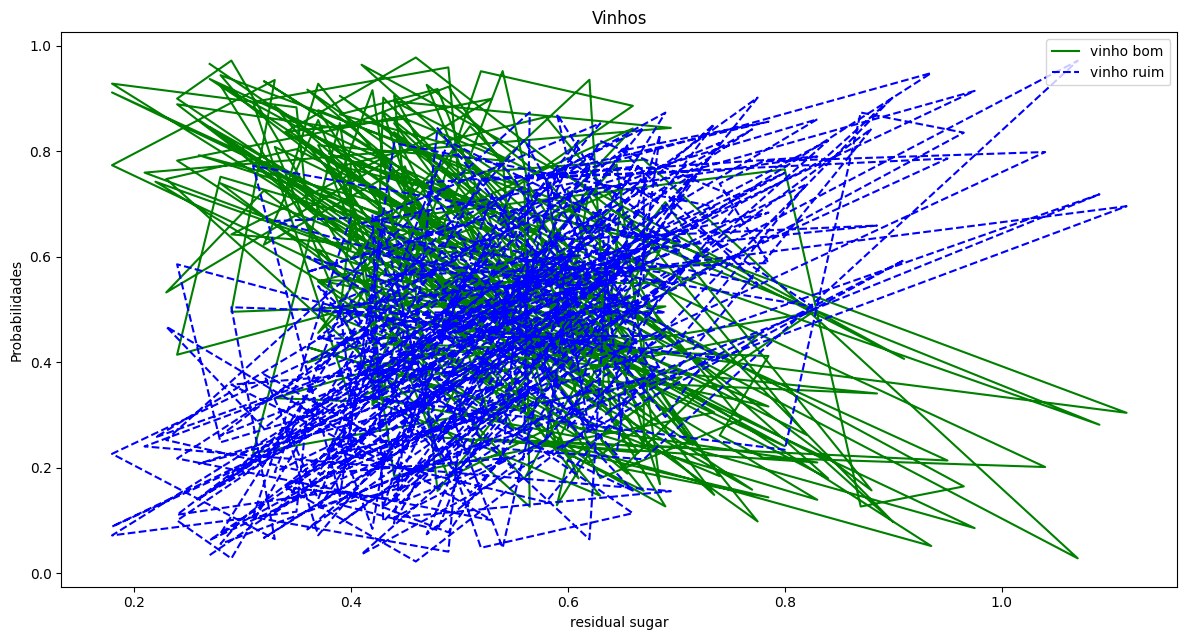

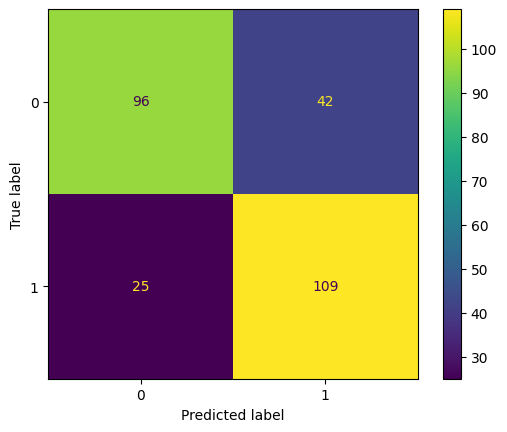

In [18]:
mlflow.set_experiment('Vinhos')

with mlflow.start_run(run_name='t2'):

    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    y_proba = log_reg.predict_proba(X_test)
    
    metrics = getAllMetrics(y_test, y_pred)
    
    mlflow.log_metrics(metrics)
    
    plot_prob(X_test,y_proba)
    plt.savefig("prob.png")

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.savefig('cm.png')    
    
    mlflow.log_artifact('prob.png')
    mlflow.log_artifact('cm.png')
    
    mlflow.sklearn.log_model(log_reg,'LR')
    print('id:',mlflow.active_run().info.run_id)
    
mlflow.end_run()
    


In [19]:
import json
import requests

In [78]:
a = np.array([[5.9,0.550,0.10,2.2, 0.062,39.0,51.0,0.99512,3.52,0.76,11.2]],np.float64).tolist()

In [79]:
json_data = json.dumps({'index':['af','av','ac','ar','clo','ld','td','den','ph','su','alc'],"data":a})

In [80]:
json_data

'{"index": ["af", "av", "ac", "ar", "clo", "ld", "td", "den", "ph", "su", "alc"], "data": [[5.9, 0.55, 0.1, 2.2, 0.062, 39.0, 51.0, 0.99512, 3.52, 0.76, 11.2]]}'

In [81]:
resposta = requests.post(url='http://localhost:2345/invocations', 
                                headers={'Content-Type':'application/json'}, 
                                 data=json_data)

In [82]:
resposta = resposta.text.replace('[','')
resposta.replace(']','')

'1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1'

In [83]:
d = {'Content-Type': 'application/json'}

In [84]:
d.split()

AttributeError: 'dict' object has no attribute 'split'

In [85]:
log_reg.predict(a)

array([1])

In [77]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
